# ARMAモデル系

　定常時系列モデルとして以下のモデルについて見ていく.

- 自己回帰モデル ${\rm AR}(p)$
- 移動平均モデル ${\rm MA}(q)$
- 自己回帰移動平均モデル ${\rm ARMA}(p, q)$

## 1. ラグ演算子

 差分作用子ならびにラグ演算は関数解析学の領域でシフト作用子として厳密に定義, 定理が整理されているが, ここでは時系列モデルの表現の簡略化のために最低限の内容だけ整理.

### 定義 1.1 (差分作用子)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**差分作用素**または**差分演算子** (difference operator) とは関数に対して適当な有限差分を与える作用素として定義され, 特に**前進差分作用素** (forward difference operator) $\Delta$ を時系列 $y_t$ に作用する場合

$$
    \Delta y_{y} = y_{t+1}- y_{t}
$$

と書ける. また**後退差分作用素** (backward difference operator) $\nabla$ は

$$
    \nabla y_{y} = y_{t} - y_{t-1}
$$

と書ける.

</div>

### 定義 1.2 (ラグ演算子)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　時系列 $y_t$ に対して**後退オペレーター** (lag operator) $L$ は 整数 $k$ を用いて以下で定義される.

$$
    L^k y_t = y_{t-k}
$$

</div>


### 定義 1.3 (ラグ多項式)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**ラグ多項式** (lag polynomials) $a(L)$ を $a(L) = a_0 + a_1 L + \cdots + a_p L^p \ s.t. a_m \in \mathbb(R), m \in \mathbb(N)$ とする. この時, 時系列 $\{ y_t \}$ に対して作用した $a(L)y_t$ は以下のように書ける.

$$
    \begin{align}
        a(L) y_t &= a_0 y_t + a_1 L y_t + \cdots + a_p L^p y_t \\
                 &= a_0 y_t + a_1 y_{t-1} + \cdots + a_p y_{t-p}
    \end{align}
$$

</div>

### 命題 1.4 (ラグ代数)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　$a, b, c, d \in \mathbb{R}$, $i, j \in \mathbb{N}$ としたとき以下が成立する.

- (1) $(a + b)L = aL + bL$
- (2) $(a + bL)(c + dL) = ac + (ad + bc)L + bdL^2$
- (3) $L^i L^j = L^{i+j}$
- (4) $L^{-1} L = 1$
- (5) $\dfrac{1}{1-aL} = 1 + aL + a^2 L^2 + \cdots =\displaystyle \sum_{i=0}^{\infty}{(aL)^i} \quad (|aL| < 1)$

</div>

(tsa:arma:lag-operator:difference-relations)=

### 命題 1.5 (ラグ演算子と差分作用子の関係)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　ラグ演算子 $L$ と後退差分作用子 $\nabla$ は以下の関係にある.

$$
    \begin{align}
        \nabla y_t = (1 - L) y_t
    \end{align}
$$

</div>

## 2. ARモデル

### 定義 2.1 (${\rm AR}(p)$モデル)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　時系列 $\{ y_t \}$ について $t = 1, 2, \cdots, T $ のとき **自己回帰モデル** (autoregressive model, AR model) は以下で定義する.

$$
    y_t = c + \sum_{i=1}^{p} {\phi_{i} y_{t-i}} + \varepsilon_t \quad s.t. \ c \in \mathbb{R}, p \in \mathbb{N}, \varepsilon_t \sim \text{WN}(0, \sigma_{\varepsilon}^2)
$$

このとき **$\text{AR}(p)$** と表す. ここで, $c$ は切片, $p$ は**自己回帰の次数**, $\phi_i$ を **$i$ 次の自己回帰係数**, $\varepsilon_t$ はホワイトノイズで表現される誤差項である.

</div>

ここでラグ多項式 $\phi_p(L)$ 
    
$$
    \begin{align}
        \phi_p(L) = 1 - (\phi_1 L^{1} + \cdots + \phi_p L^{p}) = 1 - \sum_{i=1}^{p}{\phi_i L^{i}}
    \end{align}
$$

を用いて

$$
    \phi_p(L)y_t = c + \varepsilon_t
$$

とも表現できる.

### 定理 2.2 (${\rm AR}(p)$モデルの期待値・分散・自己相関関数)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　${\rm AR}(p)$ モデルが定常な時系列過程の場合, 期待値 $\mu$ は以下のように書ける.

$$
    \begin{align}
        \mu = \frac{c}{1 - \phi_1 - \phi_2 - \cdots - \phi_p}
    \end{align}
$$

また分散 $C_0$, ラグ $k \ (= 1, 2, \dots, p)$ の自己相関関数 $C_k$ は 以下の方程式を解くことで求められる.

$$
    \begin{align}
        C_0 &= \sum_{i=1}^{p}{\phi_i C_i} + \sigma_{\varepsilon}^2 \\
        C_k &= \sum_{i=1}^{p}{\phi_i C_{k-i}}
    \end{align}
$$

上記方程式を **ユール・ウォーカー方程式** (Yule-Walker equation) と呼ばれる.

</div>

<u>証明</u>

　$\varepsilon_t \sim \text{WN}(0, \sigma_{\varepsilon}^2)$ であり定常過程の場合 $\mu = {\rm E}(y_{t-k})$ と書ける. このことを踏まえて ${\rm AR}(p)$ モデルの両辺に期待値を取ると

$$
    \begin{align}
        & {\rm E}(y_t) = {\rm E}(c) + \sum_{i=1}^{p}{\phi_i {\rm E}(y_{t-i})} + {\rm E}(\varepsilon_t) \\
        \Leftrightarrow \ & \mu = c + \mu(\phi_1 + \phi_2 + \cdots + \phi_p) \\
        \Leftrightarrow \ & (1 - \phi_1 - \phi_2 - \cdots - \phi_p)\mu = c \\
        \Leftrightarrow \ & \mu = \frac{c}{1 - \phi_1 - \phi_2 - \cdots - \phi_p}
    \end{align}
$$

となる.
　また ${\rm AR}(p)$ モデルの両辺に $\mu = c + \mu(\phi_1 + \phi_2 + \cdots + \phi_p)$ を差し引いて
 
$$
    \begin{align}
        & y_t - \mu = \sum_{i=1}^{p}{\phi_i (y_{t-i} - \mu)} + \varepsilon_t
    \end{align}
$$

両辺に $y_t - \mu$ をかけて期待値を取る. ここで, $C_0 = {\rm Cov}(y_t - \mu, y_t - \mu) = {\rm Var}(y_t)$, $C_i = {\rm Cov}(y_t - \mu, y_{t-i} - \mu)$ より

$$
    \begin{align}
        & C_0 = \sum_{i=1}^{p}{\phi_i C_i} + {\rm E}(\varepsilon_t(y_t - \mu))
    \end{align}
$$

ここで $\varepsilon_t(y_t - \mu) = \displaystyle \sum_{i=1}^{p}{\phi_i \varepsilon_t (y_{t-i} - \mu)} + \varepsilon_t^2$ で ${\rm E}(\varepsilon_t^2) = 0$ より

$$
    \begin{align}
        & {\rm}E(\varepsilon_t(y_t - \mu)) = {\rm}E(\varepsilon_t^2) = \sigma_{\varepsilon}^2
    \end{align}
$$

よって

$$
    \begin{align}
        C_0 &= \sum_{i=1}^{p}{\phi_i C_i} + \sigma_{\varepsilon}^2
    \end{align}
$$

また, $y_t - \mu$ の代わりに $y_{t-k} - \mu$ をかけて期待値を取る. このとき定常性を仮定すると ${\rm Cov}(y_{t-i}, y_{t-k}) = {\rm Cov}(y_{t}, y_{t-(k-i)}) = C_{k-i}$ より

$$
    \begin{align}
        & C_k = \sum_{i=1}^{p}{\phi_i C_{k-i}}
    \end{align}
$$

(tsa:arma:ar-model:stationarity)=

### 定理 2.3 (${\rm AR}(p)$モデルの定常性条件)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　AR特性方程式

$$
    \begin{align}
        \phi_p(x) = 1 - (\phi_1 x + \phi_2 x^2 + \cdots + \phi_p x^{p}) = 0
    \end{align}
$$

の根の絶対値が全て1より大きい場合, ${\rm AR}(p)$ モデルは定常過程である.

</div>

http://matthieustigler.github.io/Lectures/Lect2ARMA.pdf

### 例 2.4 (statsmodels による AR モデル)

#### ドキュメント

　詳細については適宜ドキュメントを参考にすること.

- `statsmodels.tsa.ar_model.AutoReg`
    - $\text{AR}(p)$ モデルを構築するためのクラスモジュール.
    - [ARモデル構築例 (公式)](https://www.statsmodels.org/stable/examples/notebooks/generated/autoregressions.html)
    - [APIドキュメント](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html#statsmodels.tsa.ar_model.AutoReg)
- `statsmodels.tsa.ar_model.ar_select_order`
    - 情報量基準が最適な $\text{AR}(p)$ の次数を選択し, その次数をもとにした `statsmodels.tsa.ar_model.AutoReg` インスタンスを返すメソッド.
    - [APIドキュメント](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ar_select_order.html)
- `statsmodels.tsa.arima.model.ARIMA`
    - $\text{AR}(p)$ モデルだけでなく, より一般的な ${\rm SARIMAX}(p, d, q)\times(P, D, Q, s)$ を構築可能なクラスモジュール.
    - [APIドキュメント](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html#generated-statsmodels-tsa-arima-model-arima--page-root)


#### 具体例

　`statsmodels.tsa.arima.model.ARIMA` で実際に構築してみる. その際に, `sandbox.datasets.air_passengers` にあるデータで実行する.


In [1]:
# 必要ライブラリを一括してインポートし図示の設定を実行.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

sns.set()
pd.plotting.register_matplotlib_converters()
sns.mpl.rc("font", size=14)

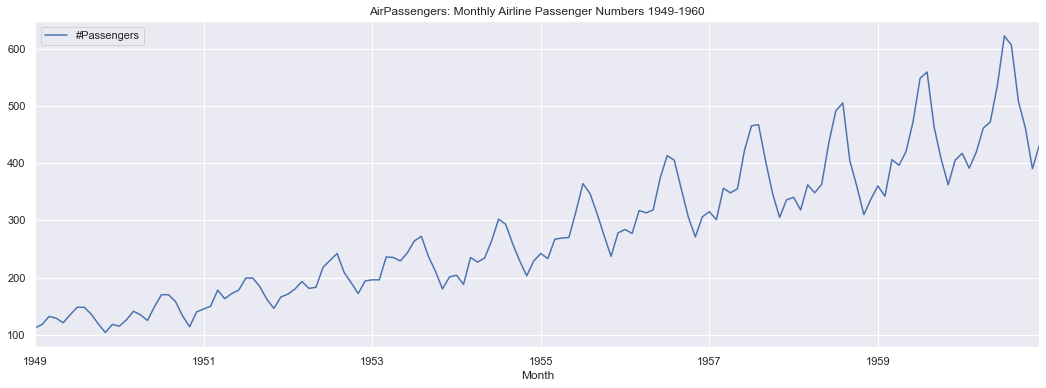

In [2]:
# analytics-sandbox にあるテストデータをインポート.
from sandbox.datasets import air_passengers

# データの読み込み
psgr = air_passengers.load().data

fig, ax = plt.subplots(figsize=(18, 6))
psgr.plot(ax=ax, title=f"{air_passengers.TITLE}")
plt.show()

　もし `sandbox` をインストールしていない場合は GitHub でクローンした後に `python setup.py install` を行うか, URL をして直接取得するかを行えばよい.

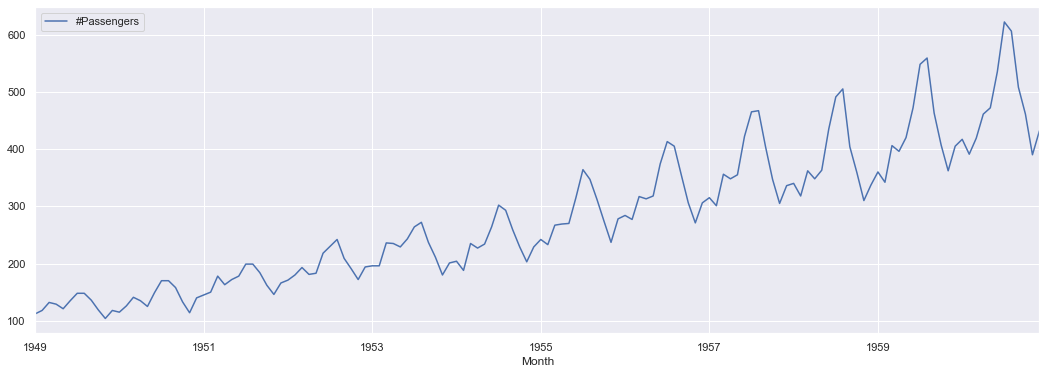

In [3]:
url = "https://raw.githubusercontent.com/sndpgm/analytics-sandbox/main/sandbox/datasets/air_passengers/air_passengers.csv"

psgr = pd.read_csv(url)
psgr.index = pd.to_datetime(psgr["Month"])
psgr.drop(columns=["Month"], inplace=True)
psgr.index.freq = "MS"

fig, ax = plt.subplots(figsize=(18, 6))
ax = psgr.plot(ax=ax)
plt.show()

　波形を見ると `air_passengers` データは非定常な時系列データのため定常時系列に近づけていく. 定常性については[時系列データ > 2.定常性](tsa:time_series:stationarity) を参照のこと.
　定常時系列に近づけるために以下を勘案することが必要.

- 平均非定常 → 上昇トレンドのため時間が経つほどに平均値が増加 → [階差](tsa:time_series:preprocess:difference) を取ることで線形トレンドを消去.
- 共分散非定常 → 時間が経つほどにブレ幅が増加 → [Box-Cox変換](tsa:time_series:preprocess:boxcox) によって低減をトライ.
- 周期性 → 12ヶ月周期での季節要因が働いているように見える → ${\rm AR}(11)$ でモデリングを実施.

In [4]:
# scikit-learn でMAPE算出モジュールとデータを訓練用とテスト用に分割するモジュールを import
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# テストデータを 20% ととしてデータを分割する.
# ただし, 時系列データのためデータ順序がシャッフルされないように設定する.
test_size = 0.20
shuffle = False
psgr_train, psgr_test = train_test_split(psgr, test_size=test_size, shuffle=shuffle)

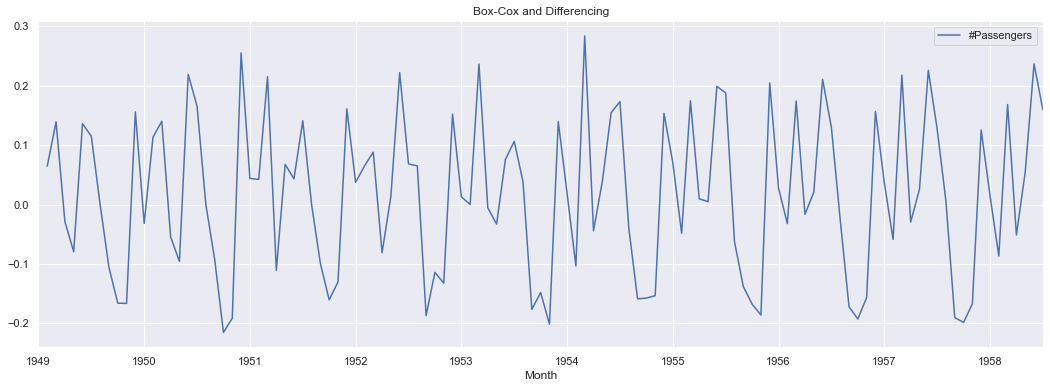

In [5]:
# trainデータについて加工し定常時系列に近づける
# Box-Cox 変換
boxcox_fitted, lam = stats.boxcox(psgr_train["#Passengers"])
psgr_train_boxcox = pd.DataFrame(
    boxcox(psgr_train["#Passengers"], lam), index=psgr_train.index
)

# 階差
psgr_train_boxcox_diff = pd.DataFrame(
    psgr_train_boxcox - psgr_train_boxcox.shift(), index=psgr_train.index
)

# 図示
fig, ax = plt.subplots(figsize=(18, 6))
psgr_train_boxcox_diff.plot(ax=ax, title="Box-Cox and Differencing")
plt.show()

In [6]:
# ADF検定で定常性が確認できるかチェック.
# pvalue < 0.1 より定常性があるとして次に進める.
ret_ = adfuller(psgr_train_boxcox_diff.dropna())
ret_keys = ["adfstat", "pvalue", "usedlag", "nobs", "critvalues", "icbest"]

i = 0
ret = dict()
for key in ret_keys:
    ret[key] = ret_[i]
    i += 1

ret

{'adfstat': -2.644121933450108,
 'pvalue': 0.08421665282428747,
 'usedlag': 12,
 'nobs': 101,
 'critvalues': {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 'icbest': -286.9590455026573}

In [7]:
# AR(11) モデル
p = 11
model_ar = ARIMA(psgr_train_boxcox_diff, order=(p, 0, 0))
model_ar_fitted = model_ar.fit()
print(model_ar_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                ARIMA(11, 0, 0)   Log Likelihood                 144.389
Date:                Wed, 20 Jul 2022   AIC                           -262.778
Time:                        21:39:13   BIC                           -227.094
Sample:                    01-01-1949   HQIC                          -248.294
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0135      0.001     15.504      0.000       0.012       0.015
ar.L1         -0.5405      0.092     -5.877      0.000      -0.721      -0.360
ar.L2         -0.7063      0.064    -11.080      0.0

/Users/yuta.sonoda/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
# 予測期間はテストデータの期間
start = psgr_test.index.min()
end = psgr_test.index.max()

# 予測値とともに 95% 信頼区間も算出
alpha = 0.05

# get_prediction メソッドにより予測結果インスタンスを取得
# 信頼区間を求める場合には予測結果インスタンスを経由し conf_int メソッドから計算
predict_result_ar = model_ar_fitted.get_prediction(start=start, end=end)

# 予測値 Series を取得
predict_ar = predict_result_ar.predicted_mean

# 信頼区間の格納された DataFrame を取得
df_ci_ar = predict_result_ar.conf_int(alpha=alpha)

# 予測値と信頼区間を一つの DataFrame にまとめる
df_predict_ar = pd.DataFrame(predict_ar)
df_predict_ar = df_predict_ar.join(df_ci_ar)

# 結果の確認
df_predict_ar.head(15)

,predicted_mean,lower #Passengers,upper #Passengers
1958-08-01,0.061463,-0.063029,0.185956
1958-09-01,-0.097127,-0.238640,0.044385
1958-10-01,-0.200663,-0.351278,-0.050048
1958-11-01,-0.168260,-0.318920,-0.017600
1958-12-01,0.073067,-0.079202,0.225335
1959-01-01,0.007349,-0.146236,0.160933
1959-02-01,-0.048439,-0.202030,0.105153
1959-03-01,0.075168,-0.078714,0.229049
1959-04-01,-0.022689,-0.177490,0.132112
1959-05-01,0.074130,-0.082009,0.230269


　ここで予測した値について再考する. 元々の時系列 $\{ y_t \}$ について Box-Cox 変換した時系列を $\{ y'_t \}$ とする. すなわち,

$$
    y'_t = {\rm BoxCox}(y_t)
$$

である. これに対して階差をとった時系列 $\{ Y_t \}$ とすれば

$$
    Y_t = \nabla y'_t = {\rm BoxCox}(y_t) - {\rm BoxCox}(y_{t-1})
$$

を学習し予測値を算出した. ゆえに予測値を $\{ y_t \}$ スケールに戻すためには階差の逆の処理をする必要がある. 予測開始時点を $t = T_s$, 予測終了時点を $t = T_e$ とする. また算出した予測値を $\hat{Y}_t$ とすれば, $\{ \hat{Y}_{T_s}, \hat{Y}_{T_s + 1}, \dots, \hat{Y}_{T_e} \}$ が予測された列となる.  
　$T_s \leq i \leq T_e$ とすれば, 
 
$$
    \hat{Y}_t = {\rm BoxCox}(\hat{y}_t) - {\rm BoxCox}(\hat{y}_{t-1})
$$

と表すと ${\rm BoxCox}(\hat{y}_i)$ は下記式々の和をとる.

$$
    \begin{align}
        \begin{matrix}
            \hat{Y}_{T_s}   & =      & {\rm BoxCox}(\hat{y}_{T_s})   & - & {\rm BoxCox}(\hat{y}_{T_s-1}) \\
            \hat{Y}_{T_s+1} & =      & {\rm BoxCox}(\hat{y}_{T_s+1}) & - & {\rm BoxCox}(\hat{y}_{T_s})   \\
                            & \cdots &                               &   &                               \\
            \hat{Y}_{i-1}   & =      & {\rm BoxCox}(\hat{y}_{i-1})   & - & {\rm BoxCox}(\hat{y}_{i-2})   \\
            \hat{Y}_{i}     & =      & {\rm BoxCox}(\hat{y}_{i})     & - & {\rm BoxCox}(\hat{y}_{i-1})
        \end{matrix}
    \end{align}
$$

つまり

$$
    \begin{align}
                          & {\rm BoxCox}(\hat{y}_{i}) - {\rm BoxCox}(\hat{y}_{T_s-1}) = \sum_{k=T_s}^{i}{\hat{Y}_{k}} \\
        \Leftrightarrow \ & {\rm BoxCox}(\hat{y}_{i}) = {\rm BoxCox}(\hat{y}_{T_s-1}) + \sum_{k=T_s}^{i}{\hat{Y}_{k}}
    \end{align}
$$

ここで ${\rm BoxCox}(\hat{y}_{T_s-1})$ は学習データから取得でき, $\displaystyle \sum_{k=T_s}^{i}{\hat{Y}_{k}}$ は `cumsum` メソッドで求めた予測値を足していけば良い.

In [9]:
init = psgr_train_boxcox["#Passengers"][-1]
df_predict_ar_cumsum = df_predict_ar.cumsum() + init
df_predict_ar_cumsum_inv_boxcox = inv_boxcox(df_predict_ar_cumsum, lam)
df_predict_ar_cumsum_inv_boxcox.head(10)

,predicted_mean,lower #Passengers,upper #Passengers
1958-08-01,514.369381,468.090308,564.999554
1958-09-01,477.908625,390.259613,584.175716
1958-10-01,410.244013,297.793931,562.596969
1958-11-01,360.656684,232.299312,555.191043
1958-12-01,381.442632,218.309259,657.455631
1959-01-01,383.595376,194.565877,741.253072
1959-02-01,369.616677,165.788508,801.415316
1959-03-01,391.523770,155.716926,949.014232
1959-04-01,384.783814,135.107276,1045.599934
1959-05-01,407.224833,126.490235,1236.796166


In [10]:
mape_ar = mean_absolute_percentage_error(
    psgr_test, df_predict_ar_cumsum_inv_boxcox["predicted_mean"]
)
mape_ar_msg = f"MAPE: {round(mape_ar, 3)}"
print(mape_ar_msg)

MAPE: 0.099


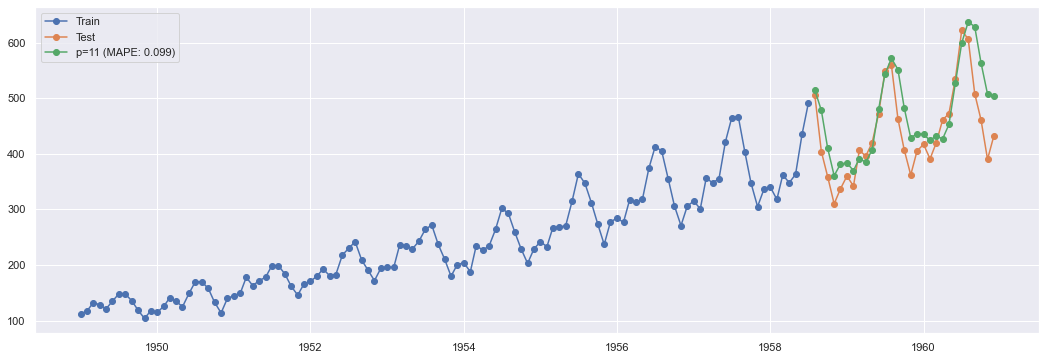

In [11]:
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(psgr_train, marker="o", label="Train")
plt.plot(psgr_test, marker="o", label="Test")
plt.plot(
    df_predict_ar_cumsum_inv_boxcox["predicted_mean"],
    marker="o",
    label=f"p={p} ({mape_ar_msg})",
)

plt.legend()
plt.show()

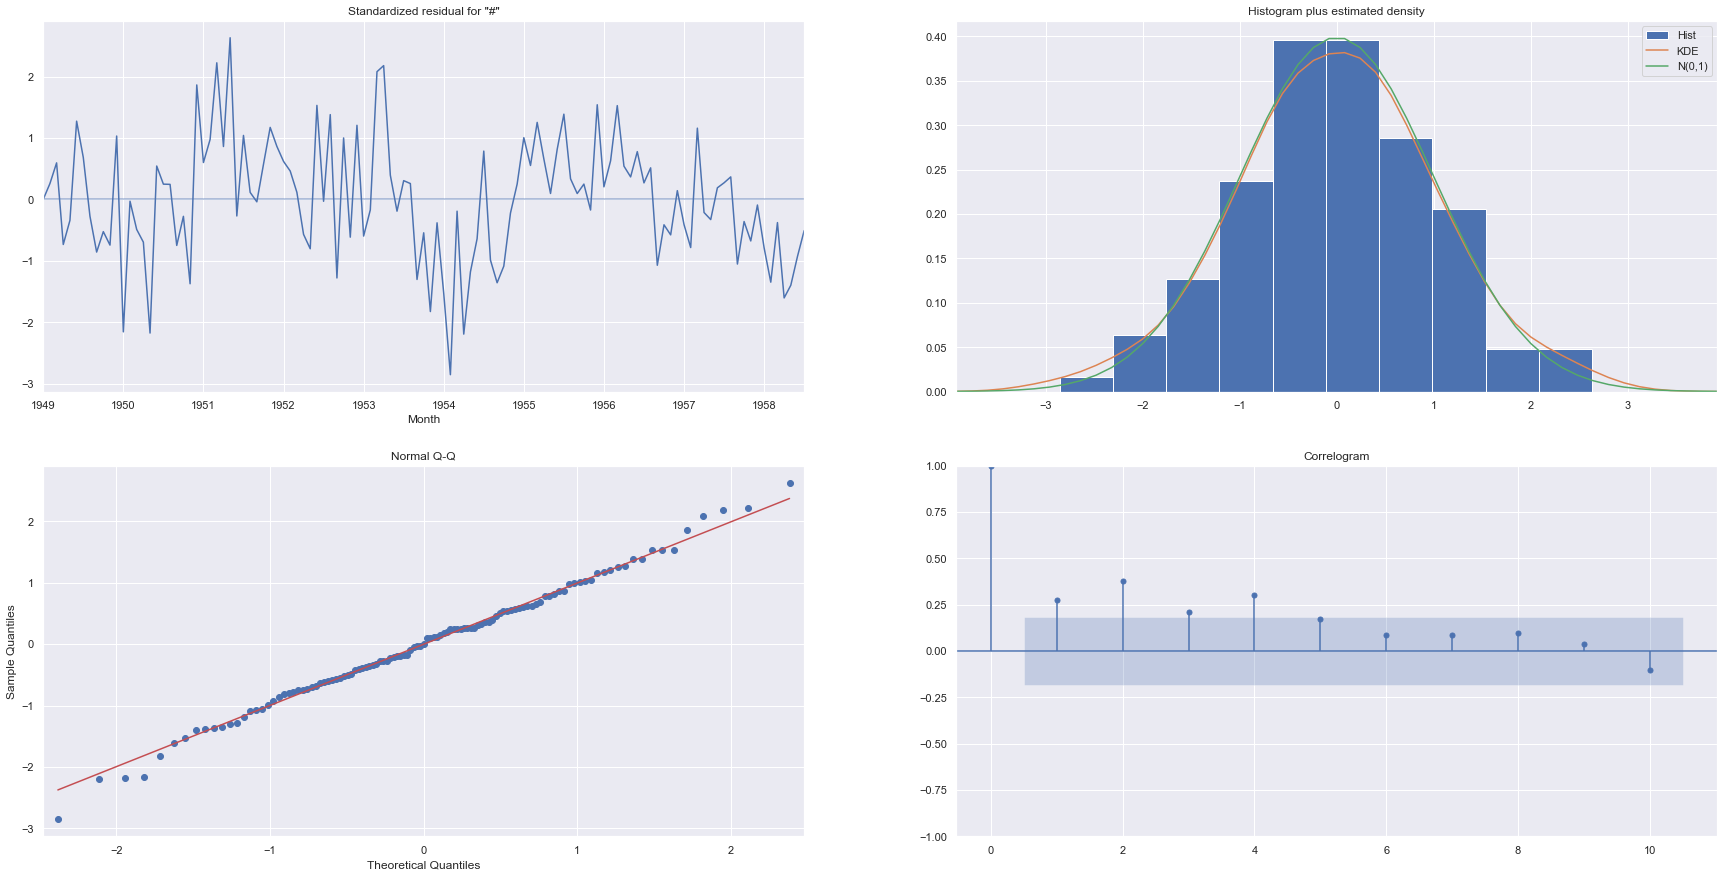

In [12]:
fig = model_ar_fitted.plot_diagnostics(figsize=(30, 15))
plt.show()

## 3. MAモデル


### 定義 3.1 (${\rm MA}(q)$モデル)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　時系列 $\{ y_t \}$ について $t = 1, 2, \cdots, T $ のとき **移動平均モデル** (moving average model, MA model) は以下で定義する.

$$
    y_t = c + \varepsilon_t + \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \quad s.t. \ c \in \mathbb{R}, q \in \mathbb{N}, \varepsilon_t \sim \text{WN}(0, \sigma_{\varepsilon}^2)
$$

このとき **$\text{MA}(q)$** と表す. ここで, $c$ は切片, $q$ は**移動平均の次数**, $\theta_i$ を **$i$ 次の移動平均係数**, $\varepsilon_t$ はホワイトノイズで表現される誤差項である.

</div>

ここでラグ多項式 $\phi_p(L)$ 
    
$$
    \begin{align}
        \theta_q(L) = 1 + (\theta_1 L^{1} + \cdots + \theta_q L^{q}) = 1 - \sum_{i=1}^{q}{\theta_i L^{i}}
    \end{align}
$$

を用いて

$$
    y_t = c + \theta_q(L) \varepsilon_t
$$

とも表現できる.

### 定理 3.2 (${\rm MA}(q)$モデルの期待値・分散・自己相関関数)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　${\rm MA}(q)$ モデルの期待値 $\mu$ は以下のように書ける.

$$
    \begin{align}
        \mu = c
    \end{align}
$$

また分散 $C_0$, ラグ $k \ (= 1, 2, \dots, p)$ の自己相関関数 $C_k$ は以下の通りである. ただし, $\theta_0 = 1$ とする.

$$
    \begin{align}
        C_0 &= (1 + \theta_1^2 + \cdots + \theta_q^2)\sigma_{\varepsilon}^2 = \sigma_{\varepsilon}^2 \sum_{i=0}^{q}{\theta_i} \\
        C_k &= \begin{cases}
            \sigma_{\varepsilon}^2 (\theta_k + \theta_1 \theta_{k+1} + \theta_2 \theta_{k+2} + \cdots + + \theta_{q-k} \theta_{q} )
                = \sigma_{\varepsilon}^2 \displaystyle \sum_{i=0}^{q-k}{\theta_i \theta_{i+k}} \quad &(1 \leq k \leq q)\\
            0 \quad &(k \gt q)
        \end{cases}
    \end{align}
$$

</div>

<u>証明</u>

　$\varepsilon_t \sim \text{WN}(0, \sigma_{\varepsilon}^2)$ のため独立かつ期待値は0であることに注意し ${\rm MA}(q)$ のモデル式の両辺に期待値を取れば $\mu = {\rm E}(y_t)$ は

$$
    \begin{align}
        {\rm E}(y_t) &= {\rm E}\biggl(c + \varepsilon_t + \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \biggr) \\
                     &= {\rm E}(c) + {\rm E}(\varepsilon_t) + \sum_{i=1}^{q}{\theta_i {\rm E}(\varepsilon_{t-i}) } \\
                     &= c
    \end{align}
$$

となる. また分散は

$$
    \begin{align}
        {\rm Var}(y_t) &= {\rm Var}\biggl(c + \varepsilon_t + \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \biggr) \\
                       &= {\rm Var}(c) + {\rm Var}(\varepsilon_t) + \sum_{i=1}^{q} {\theta_{i} {\rm Var}(\varepsilon_{t-i})} \\
                       &= (1 + \theta_1^2 + \cdots + \theta_q^2)\sigma_{\varepsilon}^2
    \end{align}
$$

と書ける. 最後にラグ $k$ の自己共分散関数は $\varepsilon_t \sim \text{WN}(0, \sigma_{\varepsilon}^2)$ のため定常過程であり ${\rm Cov}(\varepsilon_t, \varepsilon_{t-k}) = 0 \Leftrightarrow {\rm E}(\varepsilon_t, \varepsilon_{t-k}) = 0$ が成立することに注意して

$$
    \begin{align}
        {\rm Cov}(y_t, y_{t-k}) &= {\rm E}[(y_t - \mu)(y_{t-k} - \mu)] \\
                                &= {\rm E} \biggl[ 
                                    \biggl(\varepsilon_t + \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \biggr)
                                    \biggl(\varepsilon_{t-k} + \sum_{j=1}^{q} {\theta_{j} \varepsilon_{t-k-j}} \biggr)
                                \biggr] \\
                                &= {\rm E} \biggl[
                                    \varepsilon_t \varepsilon_{t-k} 
                                        + \varepsilon_t \sum_{j=1}^{q} {\theta_{j} \varepsilon_{t-k-j}}
                                        + \varepsilon_{t-k} \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}}
                                        + \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \sum_{j=1}^{q} {\theta_{j} \varepsilon_{t-k-j}}
                                \biggr] \\
                                &= {\rm E}(\varepsilon_t \varepsilon_{t-k})
                                    + {\rm E} \biggl[ \varepsilon_t \sum_{j=1}^{q} {\theta_{j} \varepsilon_{t-k-j}} \biggr]
                                    + {\rm E} \biggl[ \varepsilon_{t-k} \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \biggr]
                                    + {\rm E} \biggl[ \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \sum_{j=1}^{q} {\theta_{j} \varepsilon_{t-k-j}} \biggr] \\
                                &= {\rm E} \biggl[ \varepsilon_{t-k} \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \biggr]
                                    + {\rm E} \biggl[ \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \sum_{j=1}^{q} {\theta_{j} \varepsilon_{t-k-j}} \biggr]
    \end{align}
$$

上式において $t \neq t-k \ (\because k > 0)$ より ${\rm E}(\varepsilon_t \varepsilon_{t-q}) = 0$ で, $t \neq t-k-i \ (\because k, i > 0)$ から $\displaystyle {\rm E} \biggl[ \varepsilon_t \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-k-i}} \biggr] = 0$ である. また残りの項において $\varepsilon$ の添字が一致する条件について第 1 項は

$$
    \begin{align}
        & t - k = t - i \land 1 \leq i \leq q \\
        \Leftrightarrow \ & i = k \land 1 \leq i \leq q \\
        \Leftrightarrow \ & i = k \land 1 \leq k \leq q
    \end{align}
$$

で $\displaystyle {\rm E} \biggl[ \varepsilon_{t-k} \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \biggr] = E(\varepsilon_{k}^2) = \theta_0 \sigma_{\varepsilon}^2$ となり, 第 2 項については

$$
    \begin{align}
        & t - i = t - k - j \land 1 \leq i \leq q \land 1 \leq j \leq q \\
        \Leftrightarrow \ & i = j + k \land 1 \leq i \leq q \land 1 \leq j \leq q \\
        \Rightarrow \ & i = j + k \land 1 \leq j \leq q - k
    \end{align}
$$

つまり $1 \leq j \leq q - k$ かつ $k \leq q$ で添字が一致する. つまり

$$
    \begin{align}
        {\rm E} \biggl[ \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \sum_{j=1}^{q} {\theta_{j} \varepsilon_{t-k-j}} \biggr] = \sigma_{\varepsilon}^2 (\theta_1 \theta_{k+1} + \theta_2 \theta_{k+2} + \cdots + + \theta_{q-k} \theta_{q} )
    \end{align}
$$

となる. 全てまとめると $1 \leq k \leq q$ のとき

$$
    \begin{align}
        {\rm Cov}(y_t, y_{t-k}) = \sigma_{\varepsilon}^2 (\theta_k + \theta_1 \theta_{k+1} + \theta_2 \theta_{k+2} + \cdots + + \theta_{q-k} \theta_{q} )
    \end{align}
$$

であり, $k \gt q$ のとき添字が一致する誤差項どうしの掛け算は存在せず 0 となる.

<br>

　上記の期待値, 分散, 自己相関関数の結果から ${\rm MA}(q)$ モデルは**常に弱定常性を満たす**ことが分かる.

(tsa:arma:ma-model:stationarity)=

### 定理 3.3 (${\rm MA}(q)$モデルの反転可能性)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　MA特性方程式

$$
    \begin{align}
        \theta_q(x) = 1 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_p x^{p} = 0
    \end{align}
$$

の根の絶対値が全て1より大きい場合, ${\rm MA}(q)$ モデルは**反転可能である** (inversible).

</div>

### 例 3.4 (statsmodels による MA モデル)

#### ドキュメント

　詳細については適宜ドキュメントを参考にすること.

- `statsmodels.tsa.arima.model.ARIMA`
    - $\text{MA}(q)$ モデルだけでなく, より一般的な ${\rm SARIMAX}(p, d, q)\times(P, D, Q, s)$ を構築可能なクラスモジュール.
    - [APIドキュメント](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html#generated-statsmodels-tsa-arima-model-arima--page-root)


#### 具体例

　ARモデルと同じデータを用いて `statsmodels.tsa.arima.model.ARIMA` で実際に構築してみる.

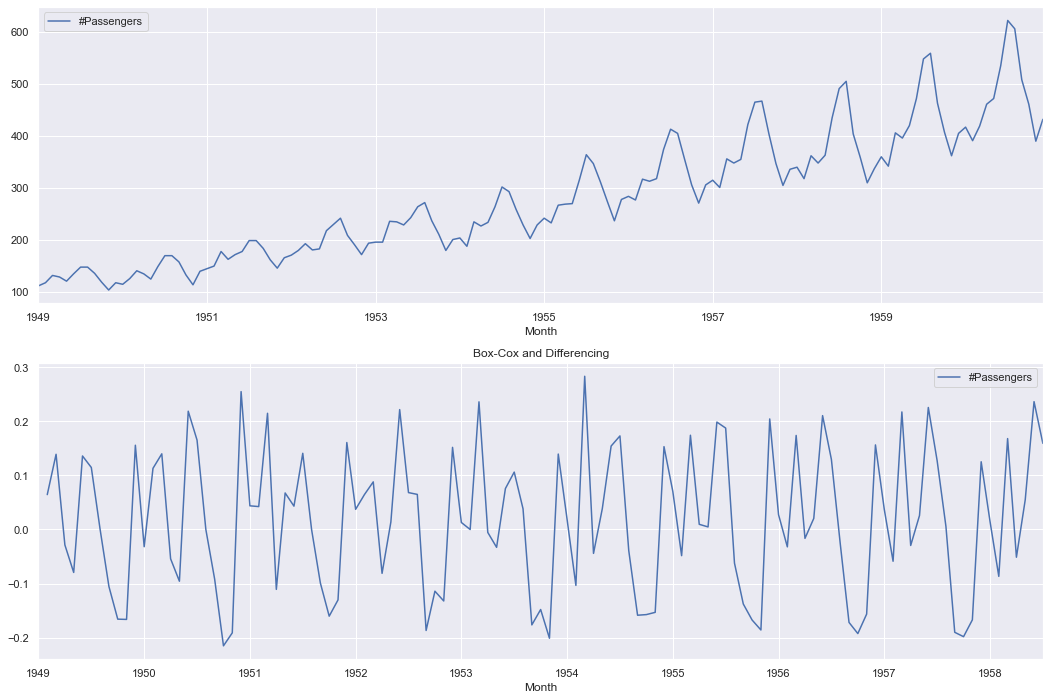

In [13]:
fig = plt.figure(figsize=(18, 12))

# 元データ
ax1 = fig.add_subplot(211)
ax1 = psgr.plot(ax=ax1)

# Box-Cox変換を行なったデータ時系列に階差をとったデータ
ax2 = fig.add_subplot(212)
ax2 = psgr_train_boxcox_diff.plot(ax=ax2, title="Box-Cox and Differencing")
plt.show()

In [14]:
# MA(11) モデル
q = 11
model_ma = ARIMA(psgr_train_boxcox_diff, order=(0, 0, q))
model_ma_fitted = model_ma.fit()
print(model_ma_fitted.summary())

/Users/yuta.sonoda/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                ARIMA(0, 0, 11)   Log Likelihood                  95.962
Date:                Wed, 20 Jul 2022   AIC                           -165.924
Time:                        21:39:14   BIC                           -130.239
Sample:                    01-01-1949   HQIC                          -151.440
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0146      0.005      3.092      0.002       0.005       0.024
ma.L1          0.2231     84.020      0.003      0.998    -164.454     164.900
ma.L2          0.3736    103.318      0.004      0.9

/Users/yuta.sonoda/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
# get_prediction メソッドにより予測結果インスタンスを取得
# 信頼区間を求める場合には予測結果インスタンスを経由し conf_int メソッドから計算
predict_result_ma = model_ma_fitted.get_prediction(start=start, end=end)

# 予測値 Series を取得
predict_ma = predict_result_ma.predicted_mean

# 信頼区間の格納された DataFrame を取得
df_ci_ma = predict_result_ma.conf_int(alpha=alpha)

# 予測値と信頼区間を一つの DataFrame にまとめる
df_predict_ma = pd.DataFrame(predict_ma)
df_predict_ma = df_predict_ma.join(df_ci_ma)

# 予測値に対して階差の逆変換, Box-Cox変換の逆変換を実施.
init = psgr_train_boxcox["#Passengers"][-1]
df_predict_ma_cumsum = df_predict_ma.cumsum() + init
df_predict_ma_cumsum_inv_boxcox = inv_boxcox(df_predict_ma_cumsum, lam)
df_predict_ma_cumsum_inv_boxcox.head(10)

,predicted_mean,lower #Passengers,upper #Passengers
1958-08-01,506.855665,437.741643,586.320051
1958-09-01,519.994001,386.113272,697.554296
1958-10-01,489.812268,308.806081,769.681463
1958-11-01,463.756111,247.644631,853.672093
1958-12-01,480.818612,217.747025,1033.242148
1959-01-01,483.938544,185.403726,1214.128063
1959-02-01,474.487227,153.367144,1390.136830
1959-03-01,492.277001,134.446081,1678.216251
1959-04-01,470.875147,106.438015,1898.065862
1959-05-01,471.363259,88.280845,2238.582740


In [16]:
mape_ma = mean_absolute_percentage_error(
    psgr_test, df_predict_ma_cumsum_inv_boxcox["predicted_mean"]
)
mape_ma_msg = f"MAPE: {round(mape_ma, 3)}"
print(mape_ma_msg)

MAPE: 0.231


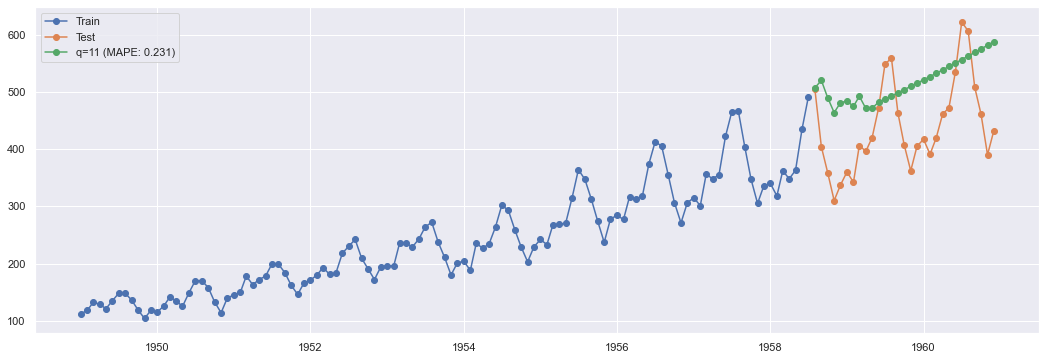

In [17]:
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(psgr_train, marker="o", label="Train")
plt.plot(psgr_test, marker="o", label="Test")
plt.plot(
    df_predict_ma_cumsum_inv_boxcox["predicted_mean"],
    marker="o",
    label=f"q={q} ({mape_ma_msg})",
)

plt.legend()
plt.show()

## 4. ARMAモデル


### 定義 4.1 (${\rm ARMA}(p, q)$モデル)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　時系列 $\{ y_t \}$ について $t = 1, 2, \cdots, T $ のとき **自己回帰移動平均モデル** (autoregressive moving average model, ARMA model) は以下で定義する.

$$
    y_t = c + \sum_{i=1}^{p} {\phi_{i} y_{t-i}} + \varepsilon_t + \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \quad s.t. \ c \in \mathbb{R}, p, q \in \mathbb{N}, \varepsilon_t \sim \text{WN}(0, \sigma_{\varepsilon}^2)
$$

このとき **$\text{ARMA}(p, q)$** と表す.

</div>

ここでラグ多項式 $\phi_p(L), \theta_q(L)$ 

$$
    \begin{align}
        \phi_p(L) &= 1 - (\phi_1 L^{1} + \cdots + \phi_p L^{p}) = 1 - \sum_{i=1}^{p}{\phi_i L^{i}} \\
        \theta_q(L) &= 1 + (\theta_1 L^{1} + \cdots + \theta_q L^{q}) = 1 - \sum_{i=1}^{q}{\theta_i L^{i}}
    \end{align}
$$

を用いて

$$
    \phi_p(L)y_t = c + \theta_q(L) \varepsilon_t
$$

とも表現できる.

### 例 4.2 (statsmodels による ARMA モデル)

#### ドキュメント

　詳細については適宜ドキュメントを参考にすること.

- `statsmodels.tsa.arima.model.ARIMA`
    - より一般的な ${\rm SARIMAX}(p, d, q)\times(P, D, Q, s)$ を構築可能なクラスモジュール.
    - [ARMAモデル構築例 (公式)](https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_1.html)
    - [APIドキュメント](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)
- `statsmodels.tsa.stattools.arma_order_select_ic`
    - ${\rm ARMA}(p, q)$ モデルにおいて情報量基準が最適となる次数 $p, q$ を選定するメソッド.
    - [APIドキュメント](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.arma_order_select_ic.html)


#### 具体例


In [18]:
# ARMA(11, 1) モデル
p = 11
q = 1
model_arma = ARIMA(psgr_train_boxcox_diff, order=(p, 0, q))
model_arma_fitted = model_arma.fit()
print(model_arma_fitted.summary())

/Users/yuta.sonoda/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                ARIMA(11, 0, 1)   Log Likelihood                 144.218
Date:                Wed, 20 Jul 2022   AIC                           -260.436
Time:                        21:39:15   BIC                           -222.007
Sample:                    01-01-1949   HQIC                          -244.838
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0135      0.001     13.918      0.000       0.012       0.015
ar.L1         -0.5796      0.230     -2.516      0.012      -1.031      -0.128
ar.L2         -0.7420      0.077     -9.659      0.0

/Users/yuta.sonoda/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
# get_prediction メソッドにより予測結果インスタンスを取得
# 信頼区間を求める場合には予測結果インスタンスを経由し conf_int メソッドから計算
predict_result_arma = model_arma_fitted.get_prediction(start=start, end=end)

# 予測値 Series を取得
predict_arma = predict_result_arma.predicted_mean

# 信頼区間の格納された DataFrame を取得
df_ci_arma = predict_result_arma.conf_int(alpha=alpha)

# 予測値と信頼区間を一つの DataFrame にまとめる
df_predict_arma = pd.DataFrame(predict_arma)
df_predict_arma = df_predict_arma.join(df_ci_arma)

# 予測値に対して階差の逆変換, Box-Cox変換の逆変換を実施.
init = psgr_train_boxcox["#Passengers"][-1]
df_predict_arma_cumsum = df_predict_arma.cumsum() + init
df_predict_arma_cumsum_inv_boxcox = inv_boxcox(df_predict_arma_cumsum, lam)
df_predict_arma_cumsum_inv_boxcox.head(10)

,predicted_mean,lower #Passengers,upper #Passengers
1958-08-01,512.709021,466.512625,563.255617
1958-09-01,477.323219,391.774673,580.544307
1958-10-01,403.870667,295.068482,550.387713
1958-11-01,361.049850,234.493943,551.368882
1958-12-01,388.883637,224.801198,663.939194
1959-01-01,379.765412,194.702625,726.465524
1959-02-01,372.636569,169.308706,798.324168
1959-03-01,394.019975,158.968942,942.534168
1959-04-01,377.677304,134.576584,1012.603697
1959-05-01,405.114884,127.993165,1211.628782


In [20]:
mape_arma = mean_absolute_percentage_error(
    psgr_test, df_predict_arma_cumsum_inv_boxcox["predicted_mean"]
)
mape_arma_msg = f"MAPE: {round(mape_arma, 3)}"
print(mape_arma_msg)

MAPE: 0.101


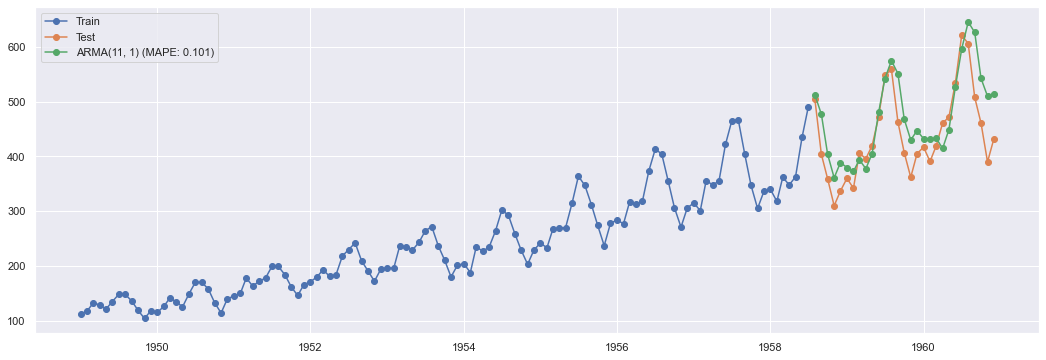

In [21]:
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(psgr_train, marker="o", label="Train")
plt.plot(psgr_test, marker="o", label="Test")
plt.plot(
    df_predict_arma_cumsum_inv_boxcox["predicted_mean"],
    marker="o",
    label=f"ARMA({p}, {q}) ({mape_arma_msg})",
)

plt.legend()
plt.show()

次に `statsmodels.tsa.stattools.arma_order_select_ic` を用いて情報量基準から最適な $p, q$ を求めてモデリングする.

In [22]:
import warnings

from statsmodels.tsa.stattools import arma_order_select_ic

# 次数選定において最尤推定の際に warning が多く発生するので, 見た目上 warning を非表示する.
warnings.simplefilter("ignore")

max_ar = 12
max_ma = 2

res = arma_order_select_ic(psgr_train_boxcox_diff, max_ar=max_ar, max_ma=max_ma)
print(res)

{'bic':              0           1           2
0  -128.830141 -129.255008 -130.693682
1  -127.564617 -130.688738 -147.048356
2  -126.642656 -148.734042 -142.446092
3  -122.060014 -142.649821 -142.523732
4  -130.816903 -126.120713 -143.335839
5  -126.118414 -121.375866 -139.335999
6  -121.424899 -116.628715 -136.047178
7  -122.974329 -159.718175 -138.067134
8  -152.250700 -176.128399 -169.180644
9  -153.495702 -172.346200 -166.812322
10 -200.595182 -206.364726 -173.144216
11 -227.093807 -222.006726 -158.883366
12 -268.099699 -268.505162 -260.903253, 'bic_min_order': (12, 1)}


In [23]:
# arma_order_select_ic メソッドで選択された (p,q) でモデリング
p = res.bic_min_order[0]
q = res.bic_min_order[1]
model_armaic = ARIMA(psgr_train_boxcox_diff, order=(p, 0, q))
model_armaic_fitted = model_armaic.fit()
print(model_armaic_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                ARIMA(12, 0, 1)   Log Likelihood                 169.840
Date:                Wed, 20 Jul 2022   AIC                           -309.679
Time:                        21:39:24   BIC                           -268.505
Sample:                    01-01-1949   HQIC                          -292.967
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0125      0.003      4.917      0.000       0.008       0.018
ar.L1          0.0175      0.138      0.127      0.899      -0.253       0.288
ar.L2         -0.1561      0.086     -1.816      0.0

In [24]:
# get_prediction メソッドにより予測結果インスタンスを取得
# 信頼区間を求める場合には予測結果インスタンスを経由し conf_int メソッドから計算
predict_result_armaic = model_armaic_fitted.get_prediction(start=start, end=end)

# 予測値 Series を取得
predict_armaic = predict_result_armaic.predicted_mean

# 信頼区間の格納された DataFrame を取得
df_ci_armaic = predict_result_armaic.conf_int(alpha=alpha)

# 予測値と信頼区間を一つの DataFrame にまとめる
df_predict_armaic = pd.DataFrame(predict_armaic)
df_predict_armaic = df_predict_armaic.join(df_ci_armaic)

# 予測値に対して階差の逆変換, Box-Cox変換の逆変換を実施.
init = psgr_train_boxcox["#Passengers"][-1]
df_predict_armaic_cumsum = df_predict_armaic.cumsum() + init
df_predict_armaic_cumsum_inv_boxcox = inv_boxcox(df_predict_armaic_cumsum, lam)

# 精度の確認
mape_armaic = mean_absolute_percentage_error(
    psgr_test, df_predict_armaic_cumsum_inv_boxcox["predicted_mean"]
)
mape_armaic_msg = f"MAPE: {round(mape_armaic, 3)}"
print(mape_armaic_msg)

MAPE: 0.047


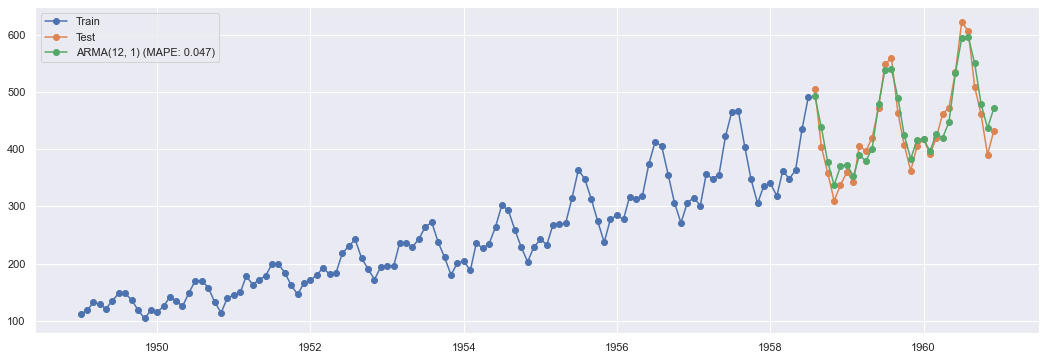

In [25]:
fig, ax = plt.subplots(figsize=(18, 6))
plt.plot(psgr_train, marker="o", label="Train")
plt.plot(psgr_test, marker="o", label="Test")
plt.plot(
    df_predict_armaic_cumsum_inv_boxcox["predicted_mean"],
    marker="o",
    label=f"ARMA({p}, {q}) ({mape_armaic_msg})",
)

plt.legend()
plt.show()

## 参考文献

- ラグ演算子
    - _時系列分析：後退オペレータについて_. (2020, August 9). Hatena. Retriece July 18, 2022, from https://messefor.hatenablog.com/entry/2020/08/09/185747
        - 日本語でラグ演算子について細かく説明している.
    - Hibbs, D. (n.d.). _Lag operations and first-order difference equations_. http://www.douglas-hibbs.com/MacroLectures/LagOperatorsAndDifferenceEquations.pdf
        - 英語であるがラグ演算子について詳しく記載されている.
